In [1]:
### General Libraries
import sys
import gc

# Data processing
import numpy as np
import pandas as pd
import scipy as sp

# For visulalization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import seaborn as sns

from pandas.tools.plotting import scatter_matrix

import IPython
from IPython import display

# For Modeling
import sklearn

#misc libraries
import timeit
import random
import time
from datetime import datetime

print('\nPython version in use is {0}'.format(sys.version))
print("NumPy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
print("SciPy version: {}". format(sp.__version__)) 

print("matplotlib version: {}". format(mpl.__version__))
print("seaborn version: {}". format(sns.__version__))
print("IPython version: {}". format(IPython.__version__)) 

print("scikit-learn version: {}". format(sklearn.__version__))
print("\nBasic Libraries loaded\n" + '-'*25 )

#Common Model Algorithms
from sklearn import dummy, linear_model, tree, ensemble, svm, neighbors, naive_bayes, discriminant_analysis, gaussian_process

#Common Model helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn import metrics

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score
from itertools import chain, zip_longest


import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from catboost import Pool

print("\nData Model Libraries loaded\n" + '-'*25 )

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_columns = 300
pd.options.display.max_colwidth = 200
print("\nDisplay settings completed\n" + '-'*25 )

# Ignore warnings
import  warnings
warnings.filterwarnings('ignore')
print("\nWarnings are ignored\n" + '-'*25 )

# Misc settings
rand_st = 7
np.random.seed(rand_st)


Python version in use is 3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
NumPy version: 1.12.1
pandas version: 0.20.3
SciPy version: 1.1.0
matplotlib version: 2.0.2
seaborn version: 0.8.0
IPython version: 5.3.0
scikit-learn version: 0.19.1

Basic Libraries loaded
-------------------------

Data Model Libraries loaded
-------------------------

Display settings completed
-------------------------

Warnings are ignored
-------------------------


## Step 1.0 b: Read the Prep input Files

In [2]:
# Read the saved file
FOLDER_PATH = '/Users/Shankar/PGMS/PYTHON/data/AV/innoplexus/'

PREP_FILENAME_1 = 'information_train.csv'
PREP_FILENAME_2 = 'train.csv'
PREP_FILENAME_TEST1 = 'information_test.csv'
PREP_FILENAME_TEST2 = 'test.csv'

train_len = 100000 #debug

# %time combined_df = pd.read_csv(FOLDER_PATH + PREP_FILENAME, compression='gzip')
%time combined_df_1 = pd.read_csv(FOLDER_PATH + PREP_FILENAME_1,delimiter='\t',parse_dates=['pub_date'], compression=None)
%time combined_df_2 = pd.read_csv(FOLDER_PATH + PREP_FILENAME_2, compression=None)
%time combined_df_test1 = pd.read_csv(FOLDER_PATH + PREP_FILENAME_TEST1,delimiter='\t',parse_dates=['pub_date'], compression=None)
%time combined_df_test2 = pd.read_csv(FOLDER_PATH + PREP_FILENAME_TEST2, compression=None)
combined_df_1.head(5)
combined_df_1.info()

combined_df_test1.head(5)
combined_df_test1.info()

combined_df_2.head(5)

CPU times: user 106 ms, sys: 16 ms, total: 122 ms
Wall time: 124 ms
CPU times: user 3.47 ms, sys: 683 µs, total: 4.15 ms
Wall time: 4.5 ms
CPU times: user 31.4 ms, sys: 4.46 ms, total: 35.8 ms
Wall time: 36.9 ms
CPU times: user 1.09 ms, sys: 261 µs, total: 1.35 ms
Wall time: 1.42 ms


,abstract,article_title,author_str,pmid,pub_date,set,full_Text
0,"Among bioethicists and members of the public, genetics is often regarded as unique in its ethical challenges. As medical researchers and clinicians increasingly combine genetic information with a ...",The routinisation of genomics and genetics: implications for ethical practices,"M W Foster, C D M Royal, R R Sharp",17074820,2006-11-01,13,NaN
1,"Genomics resources that use samples from identified populations raise scientific, social and ethical issues that are, in many ways, inextricably linked. Scientific decisions about which population...",Integrating ethics and science in the International HapMap Project,NaN,15153999,2008-02-25,13,NaN
2,Alleviating health disparities in the United States is a goal with broad support. Medical research undertaken to achieve this goal typically adopts the well-established perspective that racial dis...,Genetic Research and Health Disparities,"Pamela Sankar, Mildred K. Cho, Celeste M. Condit, Linda M. Hunt, Barbara Koenig, Patricia Marshall, Sandra Soo-Jin Lee, Paul Spicer",15213210,2008-02-20,13,NaN
3,Protecting the confidentiality of genetic research data is an important aspect of genetic research that has been discussed in various forums. Research data must be protected to prevent discriminat...,Certificates of confidentiality: a valuable tool for protecting genetic data.,"C L Earley, L C Strong",7668302,1995-09-01,13,NaN
4,"Whereas the human linkage map appears on limited evidence to be constant over populations, maps of linkage disequilibrium (LD) vary among populations that differ in gene history. The greatest diff...",Linkage disequilibrium in human populations,"Christine Lonjou, Weihua Zhang, Andrew Collins, William J. Tapper, Eiram Elahi, Nikolas Maniatis, Newton E. Morton",12721363,2003-05-13,13,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
abstract         3522 non-null object
article_title    3522 non-null object
author_str       3089 non-null object
pmid             3522 non-null int64
pub_date         3522 non-null datetime64[ns]
set              3522 non-null int64
full_Text        141 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 192.7+ KB


,abstract,article_title,author_str,pmid,pub_date,set,full_Text
0,Cell lines selected in multiple steps for increasing resistance to hydroxyurea have been shown to have corresponding increases in ribonucleotide reductase activity. We have isolated a number of cD...,"The gene for a novel protein, a member of the protein disulphide isomerase/form I phosphoinositide-specific phospholipase C family, is amplified in hydroxyurea-resistant cells.","M M Chaudhuri, P N Tonin, W H Lewis, P R Srinivasan",1311171,1992-02-01,17,NaN
1,Prolyl 4-hydroxylase (EC 1.14.11.2) is an essential enzyme in the post-translational modification of collagen. Inhibitors of this enzyme are of potential interest for the treatment of diseases inv...,Inhibition of prolyl 4-hydroxylase by hydroxyanthraquinones.,"C J Cunliffe, T J Franklin",3028370,1986-10-15,17,NaN
2,"From the structure-activity relationships of known competitive inhibitors, coumalic acid (2-oxo-1,2H-pyran-5-carboxylic acid) was deduced to be a potential syncatalytic inhibitor for chick-embryo ...",Time-dependent inactivation of chick-embryo prolyl 4-hydroxylase by coumalic acid. Evidence for a syncatalytic mechanism.,"V Gunzler, H M Hanauske-Abel, R Myllyla, J Mohr, K I Kivirikko",3036081,1987-02-15,17,NaN
3,"The anthracyclines doxorubicin and daunorubicin were found to act as irreversible inhibitors of prolyl 4-hydroxylase. The reaction rate for enzyme from both chick and human origin was first order,...",Syncatalytic inactivation of prolyl 4-hydroxylase by anthracyclines.,"V Gunzler, H M Hanauske-Abel, R Myllyla, D D Kaska, A Hanauske, K I Kivirikko",2840891,1988-04-15,17,NaN
4,The levels of lysine hydroxylase protein and the levels of the mRNAs for lysine hydroxylase and the alpha- and beta-subunits of proline 4-hydroxylase were measured in cultured human skin fibroblas...,Minoxidil specifically decreases the expression of lysine hydroxylase in cultured human skin fibroblasts.,"T Hautala, J Heikkinen, K I Kivirikko, R Myllyla",1314568,1992-04-01,17,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 7 columns):
abstract         2034 non-null object
article_title    2034 non-null object
author_str       1881 non-null object
pmid             2034 non-null int64
pub_date         2034 non-null datetime64[ns]
set              2034 non-null int64
full_Text        26 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 111.3+ KB


,pmid,ref_list
0,17074820,"['15153999', '15213210', '7668302']"
1,15153999,"['12721363', '9096352', '10788337', '9114021', '10330360']"
2,15213210,"['11466240', '12184798']"
3,7668302,['1539589']
4,12721363,"['9465087', '11842208', '11309498', '9465125', '9990074', '12486239']"


In [3]:
## Default cleaning of texts
import re, string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    
    # filter out short tokens
    tokens = [word.lower() for word in tokens if len(word) > 1]
    
    # stemming of words
    porter = PorterStemmer()
    tokens = [porter.stem(word) for word in tokens]
    return ' '.join(tokens)

In [4]:
## Some data prep
combined_df_1['abstract_clean'] = combined_df_1['abstract'].apply(clean_doc) 
combined_df_test1['abstract_clean'] = combined_df_test1['abstract'].apply(clean_doc) 

combined_df_1['article_title_clean'] = combined_df_1['article_title'].apply(clean_doc) 
combined_df_test1['article_title_clean'] = combined_df_test1['article_title'].apply(clean_doc) 

combined_df_1['full_Text_clean'] = combined_df_1['full_Text'].fillna('').apply(clean_doc) 
combined_df_test1['full_Text_clean'] = combined_df_test1['full_Text'].fillna('').apply(clean_doc) 

combined_df_1['title_abstract_clean'] = combined_df_1['article_title_clean'] + ' ' + combined_df_1['abstract_clean']
combined_df_test1['title_abstract_clean'] = combined_df_test1['article_title_clean'] + ' ' + combined_df_test1['abstract_clean']

# combined_df_1['title_abstract_Text_clean'] = combined_df_1['article_title_clean'] + ' ' + combined_df_1['abstract_clean'] + ' ' +combined_df_1['full_Text_clean'] 
# combined_df_test1['title_abstract_Text_clean'] = combined_df_test1['article_title_clean'] + ' ' +combined_df_test1['abstract_clean'] + ' ' +combined_df_test1['full_Text_clean']

combined_df_1.info()
combined_df_1.head(2)

combined_df_test1.info()
combined_df_test1.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 11 columns):
abstract                3522 non-null object
article_title           3522 non-null object
author_str              3089 non-null object
pmid                    3522 non-null int64
pub_date                3522 non-null datetime64[ns]
set                     3522 non-null int64
full_Text               141 non-null object
abstract_clean          3522 non-null object
article_title_clean     3522 non-null object
full_Text_clean         3522 non-null object
title_abstract_clean    3522 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 302.8+ KB


,abstract,article_title,author_str,pmid,pub_date,set,full_Text,abstract_clean,article_title_clean,full_Text_clean,title_abstract_clean
0,"Among bioethicists and members of the public, genetics is often regarded as unique in its ethical challenges. As medical researchers and clinicians increasingly combine genetic information with a ...",The routinisation of genomics and genetics: implications for ethical practices,"M W Foster, C D M Royal, R R Sharp",17074820,2006-11-01,13,NaN,among bioethicist member public genet often regard uniqu ethic challeng as medic research clinician increasingli combin genet inform rang inform studi clinic manag patient common diseas uniqu ethi...,the routinis genom genet implic ethic practic,,the routinis genom genet implic ethic practic among bioethicist member public genet often regard uniqu ethic challeng as medic research clinician increasingli combin genet inform rang inform studi...
1,"Genomics resources that use samples from identified populations raise scientific, social and ethical issues that are, in many ways, inextricably linked. Scientific decisions about which population...",Integrating ethics and science in the International HapMap Project,NaN,15153999,2008-02-25,13,NaN,genom resourc use sampl identifi popul rais scientif social ethic issu mani way inextric link scientif decis popul sampl produc hapmap intern genet variat resourc rais question relationship social...,integr ethic scienc intern hapmap project,,integr ethic scienc intern hapmap project genom resourc use sampl identifi popul rais scientif social ethic issu mani way inextric link scientif decis popul sampl produc hapmap intern genet variat...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 11 columns):
abstract                2034 non-null object
article_title           2034 non-null object
author_str              1881 non-null object
pmid                    2034 non-null int64
pub_date                2034 non-null datetime64[ns]
set                     2034 non-null int64
full_Text               26 non-null object
abstract_clean          2034 non-null object
article_title_clean     2034 non-null object
full_Text_clean         2034 non-null object
title_abstract_clean    2034 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 174.9+ KB


,abstract,article_title,author_str,pmid,pub_date,set,full_Text,abstract_clean,article_title_clean,full_Text_clean,title_abstract_clean
0,Cell lines selected in multiple steps for increasing resistance to hydroxyurea have been shown to have corresponding increases in ribonucleotide reductase activity. We have isolated a number of cD...,"The gene for a novel protein, a member of the protein disulphide isomerase/form I phosphoinositide-specific phospholipase C family, is amplified in hydroxyurea-resistant cells.","M M Chaudhuri, P N Tonin, W H Lewis, P R Srinivasan",1311171,1992-02-01,17,NaN,cell line select multipl step increas resist hydroxyurea shown correspond increas ribonucleotid reductas activ we isol number cdna clone cdna librari construct highli hydroxyurearesist hamster cel...,the gene novel protein member protein disulphid isomeraseform phosphoinositidespecif phospholipas famili amplifi hydroxyurearesist cell,,the gene novel protein member protein disulphid isomeraseform phosphoinositidespecif phospholipas famili amplifi hydroxyurearesist cell cell line select multipl step increas resist hydroxyurea sho...
1,Prolyl 4-hydroxylase (EC 1.14.11.2) is an essential enzyme in the post-translational modification of collagen. Inhibitors of this enzyme are of potential interest for the treatment of diseases inv...,Inhibition of prolyl 4-hydroxylase by hydroxyanthraquinones.,"C J Cunliffe, T J Franklin",3028370,1986-10-15,17,NaN,prolyl ec essenti enzym posttransl modif collagen inhibitor enzym potenti interest treatment diseas involv excess deposit collagen we found anthraquinon least two hydroxi group ortho potent inhibi...,inhibit prolyl hydroxyanthraquinon,,inhibit prolyl hydroxyanthraquinon prolyl ec essenti enzym posttransl modif collagen inhibitor enzym potenti interest treatment diseas involv excess deposit collagen we found anthraquinon least tw...


In [24]:
### Null value handling
combined_df_1.isnull().sum()
combined_df_1['author_str'] = combined_df_1['author_str'].fillna('')
combined_df_1.isnull().sum()

combined_df_test1.isnull().sum()
combined_df_test1['author_str'] = combined_df_test1['author_str'].fillna('')
combined_df_test1.isnull().sum()

abstract                   0
article_title              0
author_str                 0
pmid                       0
pub_date                   0
set                        0
full_Text               3381
abstract_clean             0
article_title_clean        0
full_Text_clean            0
title_abstract_clean       0
dtype: int64

abstract                   0
article_title              0
author_str                 0
pmid                       0
pub_date                   0
set                        0
full_Text               3381
abstract_clean             0
article_title_clean        0
full_Text_clean            0
title_abstract_clean       0
dtype: int64

abstract                   0
article_title              0
author_str               153
pmid                       0
pub_date                   0
set                        0
full_Text               2008
abstract_clean             0
article_title_clean        0
full_Text_clean            0
title_abstract_clean       0
dtype: int64

abstract                   0
article_title              0
author_str                 0
pmid                       0
pub_date                   0
set                        0
full_Text               2008
abstract_clean             0
article_title_clean        0
full_Text_clean            0
title_abstract_clean       0
dtype: int64

In [26]:
set(combined_df_1.set)
set(combined_df_test1.set)

combined_df_1.groupby('set').size()
combined_df_test1.groupby('set').size()

{2, 3, 5, 6, 8, 13, 14, 16, 18}

{1, 4, 7, 9, 10, 11, 15, 17, 19}

set
2     173
3     603
5     502
6     107
8     388
13    218
14    410
16    753
18    368
dtype: int64

set
1     168
4     336
7      63
9     358
10    324
11     71
15    239
17    266
19    209
dtype: int64

In [7]:
train_len

100000

In [142]:
combined_df_2.iloc[0,:]
combined_df_1.loc[combined_df_1['pmid'].isin([17074820,15153999, 15213210, 7668302]) ,:]




pmid                                   17074820
ref_list    ['15153999', '15213210', '7668302']
Name: 0, dtype: object

,abstract,article_title,author_str,pmid,pub_date,set,full_Text,abstract_clean,article_title_clean,full_Text_clean,title_abstract_clean
0,"Among bioethicists and members of the public, genetics is often regarded as unique in its ethical challenges. As medical researchers and clinicians increasingly combine genetic information with a ...",The routinisation of genomics and genetics: implications for ethical practices,"M W Foster, C D M Royal, R R Sharp",17074820,2006-11-01,13,NaN,among bioethicist member public genet often regard uniqu ethic challeng as medic research clinician increasingli combin genet inform rang inform studi clinic manag patient common diseas uniqu ethi...,the routinis genom genet implic ethic practic,,the routinis genom genet implic ethic practic among bioethicist member public genet often regard uniqu ethic challeng as medic research clinician increasingli combin genet inform rang inform studi...
1,"Genomics resources that use samples from identified populations raise scientific, social and ethical issues that are, in many ways, inextricably linked. Scientific decisions about which population...",Integrating ethics and science in the International HapMap Project,NaN,15153999,2008-02-25,13,NaN,genom resourc use sampl identifi popul rais scientif social ethic issu mani way inextric link scientif decis popul sampl produc hapmap intern genet variat resourc rais question relationship social...,integr ethic scienc intern hapmap project,,integr ethic scienc intern hapmap project genom resourc use sampl identifi popul rais scientif social ethic issu mani way inextric link scientif decis popul sampl produc hapmap intern genet variat...
2,Alleviating health disparities in the United States is a goal with broad support. Medical research undertaken to achieve this goal typically adopts the well-established perspective that racial dis...,Genetic Research and Health Disparities,"Pamela Sankar, Mildred K. Cho, Celeste M. Condit, Linda M. Hunt, Barbara Koenig, Patricia Marshall, Sandra Soo-Jin Lee, Paul Spicer",15213210,2008-02-20,13,NaN,allevi health dispar unit state goal broad support medic research undertaken achiev goal typic adopt wellestablish perspect racial discrimin poverti major contributor unequ health statu howev sugg...,genet research health dispar,,genet research health dispar allevi health dispar unit state goal broad support medic research undertaken achiev goal typic adopt wellestablish perspect racial discrimin poverti major contributor ...
3,Protecting the confidentiality of genetic research data is an important aspect of genetic research that has been discussed in various forums. Research data must be protected to prevent discriminat...,Certificates of confidentiality: a valuable tool for protecting genetic data.,"C L Earley, L C Strong",7668302,1995-09-01,13,NaN,protect confidenti genet research data import aspect genet research discuss variou forum research data must protect prevent discrimin use litig the certif confidenti creat protect subject alcohol ...,certif confidenti valuabl tool protect genet data,,certif confidenti valuabl tool protect genet data protect confidenti genet research data import aspect genet research discuss variou forum research data must protect prevent discrimin use litig th...


abstract                   0
article_title              0
author_str               433
pmid                       0
pub_date                   0
set                        0
full_Text               3381
abstract_clean             0
article_title_clean        0
full_Text_clean            0
title_abstract_clean       0
dtype: int64

abstract                   0
article_title              0
author_str                 0
pmid                       0
pub_date                   0
set                        0
full_Text               3381
abstract_clean             0
article_title_clean        0
full_Text_clean            0
title_abstract_clean       0
dtype: int64

In [10]:
combined_df_1.loc[combined_df_1['pmid'] == 17074820,  ]
combined_df_1.loc[combined_df_1['pmid'] == 15153999,  ]
combined_df_1.loc[combined_df_1['pmid'] == 15213210,  ]
combined_df_1.loc[combined_df_1['pmid'] == 7668302,  ]

,abstract,article_title,author_str,pmid,pub_date,set,full_Text,abstract_clean,article_title_clean,full_Text_clean,title_abstract_Text_clean,title_abstract_clean
0,"Among bioethicists and members of the public, genetics is often regarded as unique in its ethical challenges. As medical researchers and clinicians increasingly combine genetic information with a ...",The routinisation of genomics and genetics: implications for ethical practices,"M W Foster, C D M Royal, R R Sharp",17074820,2006-11-01,13,NaN,among bioethicist member public genet often regard uniqu ethic challeng as medic research clinician increasingli combin genet inform rang inform studi clinic manag patient common diseas uniqu ethi...,the routinis genom genet implic ethic practic,,the routinis genom genet implic ethic practic among bioethicist member public genet often regard uniqu ethic challeng as medic research clinician increasingli combin genet inform rang inform studi...,the routinis genom genet implic ethic practic among bioethicist member public genet often regard uniqu ethic challeng as medic research clinician increasingli combin genet inform rang inform studi...


,abstract,article_title,author_str,pmid,pub_date,set,full_Text,abstract_clean,article_title_clean,full_Text_clean,title_abstract_Text_clean,title_abstract_clean
1,"Genomics resources that use samples from identified populations raise scientific, social and ethical issues that are, in many ways, inextricably linked. Scientific decisions about which population...",Integrating ethics and science in the International HapMap Project,NaN,15153999,2008-02-25,13,NaN,genom resourc use sampl identifi popul rais scientif social ethic issu mani way inextric link scientif decis popul sampl produc hapmap intern genet variat resourc rais question relationship social...,integr ethic scienc intern hapmap project,,integr ethic scienc intern hapmap project genom resourc use sampl identifi popul rais scientif social ethic issu mani way inextric link scientif decis popul sampl produc hapmap intern genet variat...,integr ethic scienc intern hapmap project genom resourc use sampl identifi popul rais scientif social ethic issu mani way inextric link scientif decis popul sampl produc hapmap intern genet variat...


,abstract,article_title,author_str,pmid,pub_date,set,full_Text,abstract_clean,article_title_clean,full_Text_clean,title_abstract_Text_clean,title_abstract_clean
2,Alleviating health disparities in the United States is a goal with broad support. Medical research undertaken to achieve this goal typically adopts the well-established perspective that racial dis...,Genetic Research and Health Disparities,"Pamela Sankar, Mildred K. Cho, Celeste M. Condit, Linda M. Hunt, Barbara Koenig, Patricia Marshall, Sandra Soo-Jin Lee, Paul Spicer",15213210,2008-02-20,13,NaN,allevi health dispar unit state goal broad support medic research undertaken achiev goal typic adopt wellestablish perspect racial discrimin poverti major contributor unequ health statu howev sugg...,genet research health dispar,,genet research health dispar allevi health dispar unit state goal broad support medic research undertaken achiev goal typic adopt wellestablish perspect racial discrimin poverti major contributor ...,genet research health dispar allevi health dispar unit state goal broad support medic research undertaken achiev goal typic adopt wellestablish perspect racial discrimin poverti major contributor ...


,abstract,article_title,author_str,pmid,pub_date,set,full_Text,abstract_clean,article_title_clean,full_Text_clean,title_abstract_Text_clean,title_abstract_clean
3,Protecting the confidentiality of genetic research data is an important aspect of genetic research that has been discussed in various forums. Research data must be protected to prevent discriminat...,Certificates of confidentiality: a valuable tool for protecting genetic data.,"C L Earley, L C Strong",7668302,1995-09-01,13,NaN,protect confidenti genet research data import aspect genet research discuss variou forum research data must protect prevent discrimin use litig the certif confidenti creat protect subject alcohol ...,certif confidenti valuabl tool protect genet data,,certif confidenti valuabl tool protect genet data protect confidenti genet research data import aspect genet research discuss variou forum research data must protect prevent discrimin use litig th...,certif confidenti valuabl tool protect genet data protect confidenti genet research data import aspect genet research discuss variou forum research data must protect prevent discrimin use litig th...


In [341]:
## Look within same set
unique_sets_train = set(combined_df_1.set)
unique_sets_test = set(combined_df_test1.set)

## Data preparation

In [11]:
## ----- De-normalize the refrerence lists
import ast
from itertools import combinations
from sklearn.feature_extraction.text import TfidfVectorizer

combined_df_2.head()

from collections import defaultdict
train_pmid_dic = defaultdict(list, zip(combined_df_2['pmid'], combined_df_2['ref_list'].apply(ast.literal_eval)))

comb_df = pd.DataFrame(dtype='int64')
train_uniq_sets = set(combined_df_1.set)
# train_uniq_sets = {2}
for curr_set in train_uniq_sets:
    curr_set_comb_df = pd.DataFrame(dtype='int64')
    ## find list of pmid in this set
    curr_pmid_lists = list(combined_df_2.loc[combined_df_1['set'] == curr_set,'pmid'])
    
    print('Current set is {0} and total # of pmid is: {1} \n**********'.format(curr_set, len(curr_pmid_lists)))
    print('All pmid in this set are: {0}'.format(curr_pmid_lists))
    
    ## Build combineation 
    for idx, curr_comb in enumerate(combinations(curr_pmid_lists, r=2)):
#         print('{0} --> {1} --> {2} ----- {3}  --- {4} '.format(idx, curr_comb[0], curr_comb[1], type(curr_comb[0]) , type(curr_comb[1])))
        left_pmid = curr_comb[0]
        right_pmid = curr_comb[1]
        curr_set_comb_df.loc[idx, 'set'] = curr_set
        curr_set_comb_df.loc[idx, 'pmid'] = left_pmid
        curr_set_comb_df.loc[idx, 'ref_pmid'] = right_pmid
        curr_set_comb_df.loc[idx, 'referred'] = sum([1 if ref == str(right_pmid) else 0 for ref in train_pmid_dic[left_pmid]])

    comb_df = comb_df.append(curr_set_comb_df, ignore_index=True)
        
comb_df['set'] = comb_df['set'].astype('int64') 
comb_df['pmid'] = comb_df['pmid'].astype('int64')  
comb_df['ref_pmid'] = comb_df['ref_pmid'].astype('int64')        
comb_df['referred'] = comb_df['referred'].astype('int64')        

## Cross check the referenced values ...
comb_df.groupby(['set']).size()
comb_df.loc[comb_df['referred'] > 0, :] 

## ----------------------------
## --- Feature engineering
## ----------------------------

## Build author experience dictionary across entire training dataset
pmid_authors = list(combined_df_1['author_str'].apply(lambda x: x.split(',')))
indiv_authors = [each.strip() for ea in pmid_authors for each in ea]
author_exp_dict = defaultdict(int, pd.Series(indiv_authors).value_counts())
author_exp_dict

full_train_df = pd.DataFrame()
train_uniq_sets = set(combined_df_1.set)
# train_uniq_sets = {2}
for curr_set in train_uniq_sets:
    train_df = pd.DataFrame()
    print('Current data processing set is {0} \n**********'.format(curr_set))
    
    ## NLP processing for this set ...
    pmid_list = combined_df_1.loc[combined_df_1['set'] == curr_set, 'pmid']
    numb_list = range(0, len(pmid_list))
    num_pmid_dict = dict(zip_longest(numb_list, pmid_list))
    pmid_num_dict = dict(zip_longest(pmid_list, numb_list))

    tfidf = TfidfVectorizer().fit_transform(combined_df_1.loc[combined_df_1['set'] == curr_set, 'title_abstract_clean'] )

    # no need to normalize, since Vectorizer will return normalized tf-idf
#     temp = (tfidf * tfidf.T)
    pairwise_similarity = (tfidf * tfidf.T).A

    # for idx, row in comb_df.loc[0:2, ['set','pmid', 'ref_pmid','referred']].iterrows():  #Debugging
    for idx, row in comb_df.loc[comb_df['set'] == curr_set,['set','pmid', 'ref_pmid','referred']].iterrows():
        train_df.loc[idx, 'set'] = row[0]
        train_df.loc[idx, 'pmid'] = row[1]
        train_df.loc[idx, 'ref_pmid'] = row[2]
        train_df.loc[idx, 'referred'] = row[3]


        left_pmid = row[1]
        right_pmid = row[2]
    #     print('Processing for: {0} and {1} \n*********'.format(left_pmid, right_pmid))

        # Matching entry
        left_series = combined_df_1.loc[combined_df_1['pmid'] == left_pmid, :]
        right_series = combined_df_1.loc[combined_df_1['pmid'] == right_pmid, :]

        ## Authors
        left_authors = set([each_author.strip() for each_author in left_series['author_str'].values[0].split(',')])
        right_authors = set([each_author.strip() for each_author in right_series['author_str'].values[0].split(',')])

        train_df.loc[idx, 'pmid_num_authors'] = len(left_authors)
        train_df.loc[idx, 'ref_num_authors'] = len(right_authors)
        train_df.loc[idx, 'common_num_authors'] = len(left_authors.intersection(right_authors))

        left_auth_exp = 0
        left_max_auth_exp = 0
        for each_auth in left_authors:
            left_auth_exp = left_auth_exp + author_exp_dict[each_auth]
            if author_exp_dict[each_auth] > left_max_auth_exp :
                left_max_auth_exp = author_exp_dict[each_auth]

        right_auth_exp = 0
        right_max_auth_exp = 0
        for each_auth in right_authors:
            right_auth_exp = right_auth_exp + author_exp_dict[each_auth]
            if author_exp_dict[each_auth] > right_max_auth_exp :
                right_max_auth_exp = author_exp_dict[each_auth]

        train_df.loc[idx, 'pmid_tot_author_experiences'] = left_auth_exp   
        train_df.loc[idx, 'ref_tot_author_experiences'] = right_auth_exp  
        train_df.loc[idx, 'common_tot_author_experiences'] = left_auth_exp + right_auth_exp 

        train_df.loc[idx, 'pmid_senior_author_experience'] = left_max_auth_exp 
        train_df.loc[idx, 'ref_senior_author_experience'] = right_max_auth_exp 


        ## Publication dates
        left_pub_date = left_series['pub_date'].values[0]
        right_pub_date = right_series['pub_date'].values[0]   
        train_df.loc[idx, 'pub_date_diff'] = (right_pub_date - left_pub_date).astype('timedelta64[D]')/ np.timedelta64(1, 'D')

        ## NLP columns
        left_number = pmid_num_dict[left_pmid]
        right_number = pmid_num_dict[right_pmid]

#         left_number
#         right_number
#         pairwise_similarity[left_number,]
        train_df.loc[idx, 'tfidf_similarity'] = pairwise_similarity[left_number,right_number]
    
    full_train_df = full_train_df.append(train_df, ignore_index=True)
    
## Make everything integer
# train_df = train_df.applymap(lambda x: int(x))

temp_tfidf_precision = full_train_df['tfidf_similarity'].apply(lambda x: '{0:.3f}'.format(x) )
full_train_df = full_train_df.applymap(lambda x: int(x))
full_train_df['tfidf_similarity'] = temp_tfidf_precision

## Verifications ...
full_train_df.loc[full_train_df['referred'] > 0, :] 
full_train_df.head(5)

,pmid,ref_list
0,17074820,"['15153999', '15213210', '7668302']"
1,15153999,"['12721363', '9096352', '10788337', '9114021', '10330360']"
2,15213210,"['11466240', '12184798']"
3,7668302,['1539589']
4,12721363,"['9465087', '11842208', '11309498', '9465125', '9990074', '12486239']"


Current set is 2 and total # of pmid is: 173 
**********
All pmid in this set are: [16927957, 16277606, 3488550, 8019746, 11532965, 8170966, 10385247, 9484853, 7679023, 6958342, 14392240, 6172582, 6132387, 2043924, 411921, 926021, 5049809, 2850055, 2158369, 2538191, 2538194, 2538184, 1653072, 2158835, 1675143, 2758221, 1797334, 8719796, 7606344, 8564234, 7437756, 9770522, 359747, 9767415, 7969144, 10673502, 9356439, 9447965, 9819381, 9891084, 6289955, 1664765, 1565658, 1327382, 8380639, 8382735, 7679026, 1719549, 8383563, 8590984, 1665729, 6180162, 6184468, 6267608, 6933488, 13130789, 14392241, 268651, 284371, 6987667, 6100842, 119042, 2919186, 13651579, 5573439, 5116036, 26908, 6802362, 7086442, 6249436, 2553192, 2969267, 7357206, 3978321, 2933110, 2937503, 3814920, 184872, 497528, 3207999, 2541857, 3955301, 3607360, 2522333, 6199494, 2866004, 7153937, 667498, 3370393, 3259257, 2316620, 2416378, 1884106, 2470460, 2464382, 7780655, 2436702, 7921621, 9146885, 10073743, 2207493, 2169944,

Current set is 6 and total # of pmid is: 107 
**********
All pmid in this set are: [18715741, 20117908, 20307795, 21371752, 19296223, 21359109, 18458279, 21138199, 19089500, 20627427, 20307793, 20458550, 21382667, 25040021, 20307796, 21773951, 22036303, 23332439, 25218919, 26056209, 22684424, 23186149, 18804923, 8704540, 18665685, 20958844, 18259871, 22263709, 18552728, 19008068, 10622013, 12939891, 10897189, 17434704, 17434708, 17434707, 17434709, 22029398, 10101999, 10102003, 18286804, 22704124, 19874152, 21466501, 21844833, 20106601, 21403039, 22534003, 21310583, 26350930, 23908999, 24615308, 10695069, 8704541, 17084798, 20934836, 17129680, 17433862, 17434705, 18557164, 18805686, 18770082, 22227755, 19345512, 21821378, 21858956, 21962726, 21126830, 21802134, 20595255, 20978062, 23357743, 24132519, 18837637, 19540702, 19736902, 21831565, 23580023, 19440415, 22810057, 22456246, 19443133, 20397939, 18292710, 19344441, 15970068, 19535400, 20847018, 21490215, 21276808, 19089508, 18997874

Current set is 16 and total # of pmid is: 753 
**********
All pmid in this set are: [8944203, 1370845, 8380182, 1691208, 2155917, 2157735, 2159539, 2161866, 2549095, 2819870, 2986127, 6097599, 3404526, 2326177, 2160802, 1847008, 1850635, 6325492, 4148753, 6269067, 284385, 3060247, 2919166, 2991576, 2447830, 2993351, 2852677, 6323766, 2992365, 2839690, 2839722, 2845133, 14127971, 6272282, 6287000, 6323749, 6324136, 6324200, 6330698, 3003384, 3512851, 3006071, 215997, 224211, 3033275, 3039165, 2835660, 2836612, 2476566, 2583126, 2555560, 2555569, 271968, 2984245, 2410905, 3474623, 3375076, 3200828, 6300854, 6546431, 6287019, 6726891, 6183443, 6310601, 6694911, 6208377, 1370849, 6244553, 6260985, 6273836, 6284987, 6310508, 6865944, 3668915, 2836621, 2825196, 5780700, 6331168, 2826637, 3003395, 2437321, 6092681, 6571704, 223612, 1847316, 6256764, 6279697, 4148752, 1105573, 360212, 388356, 390497, 19730, 10793753, 6191328, 3945551, 3003749, 3004048, 3005635, 6325487, 6371049, 6427769, 63746

set
2      14878
3     181503
5     125751
6       5671
8      75078
13     23653
14     83845
16    283128
18     67528
dtype: int64

,set,pmid,ref_pmid,referred
0,2,16927957,16277606,1
1,2,16927957,3488550,1
173,2,16277606,8019746,1
174,2,16277606,11532965,1
350,2,3488550,14392240,1
351,2,3488550,6172582,1
352,2,3488550,6132387,1
535,2,8019746,1797334,1
711,2,11532965,7969144,1
712,2,11532965,10673502,1


defaultdict(int,
            {'': 433,
             'E Wimmer': 28,
             'A J Kenny': 25,
             'A J Turner': 17,
             'Zanvil A. Cohn': 17,
             'Virginia M.-Y. Lee': 17,
             'Hans J. Muller-Eberhard': 16,
             'John Q. Trojanowski': 16,
             'B L Semler': 16,
             'Ronald C. Petersen': 15,
             'Bradley F. Boeve': 14,
             'P. P. Humphrey': 14,
             'D J Anstee': 14,
             'D Baltimore': 13,
             'Clifford R. Jack': 13,
             'W. Feniuk': 13,
             'M J Tanner': 13,
             'P Chambon': 13,
             'Bruce L. Miller': 13,
             'Dennis W. Dickson': 12,
             'Robert P. Schwartz': 11,
             'N M Hooper': 11,
             'David S. Knopman': 11,
             'James G. Hirsch': 11,
             'E L Reinherz': 11,
             'S L Woo': 10,
             'L A Herzenberg': 10,
             'Peter A. Ward': 10,
             'A F Williams': 10,


Current data processing set is 2 
**********
Current data processing set is 3 
**********
Current data processing set is 5 
**********
Current data processing set is 6 
**********
Current data processing set is 8 
**********
Current data processing set is 13 
**********
Current data processing set is 14 
**********
Current data processing set is 16 
**********
Current data processing set is 18 
**********


,set,pmid,ref_pmid,referred,pmid_num_authors,ref_num_authors,common_num_authors,pmid_tot_author_experiences,ref_tot_author_experiences,common_tot_author_experiences,pmid_senior_author_experience,ref_senior_author_experience,pub_date_diff,tfidf_similarity
0,2,16927957,16277606,1,1,5,1,2,6,8,2,2,-1849,0.412
1,2,16927957,3488550,1,1,4,0,2,7,9,2,2,-9105,0.367
173,2,16277606,8019746,1,5,2,0,6,2,8,2,1,-4487,0.043
174,2,16277606,11532965,1,5,3,0,6,3,9,2,1,-1744,0.187
350,2,3488550,14392240,1,4,3,0,7,6,13,2,2,-11354,0.046
351,2,3488550,6172582,1,4,3,3,7,6,13,2,2,-1795,0.251
352,2,3488550,6132387,1,4,3,0,7,3,10,2,1,-1218,0.073
535,2,8019746,1797334,1,2,2,0,2,6,8,1,5,-851,0.212
711,2,11532965,7969144,1,3,5,0,3,5,8,1,1,-2468,0.353
712,2,11532965,10673502,1,3,8,0,3,15,18,1,4,-580,0.212


,set,pmid,ref_pmid,referred,pmid_num_authors,ref_num_authors,common_num_authors,pmid_tot_author_experiences,ref_tot_author_experiences,common_tot_author_experiences,pmid_senior_author_experience,ref_senior_author_experience,pub_date_diff,tfidf_similarity
0,2,16927957,16277606,1,1,5,1,2,6,8,2,2,-1849,0.412
1,2,16927957,3488550,1,1,4,0,2,7,9,2,2,-9105,0.367
2,2,16927957,8019746,0,1,2,0,2,2,4,2,1,-6336,0.041
3,2,16927957,11532965,0,1,3,0,2,3,5,2,1,-3593,0.080
4,2,16927957,8170966,0,1,4,0,2,6,8,2,3,-6280,0.107


In [74]:
## ----- TEST DATASET - De-normalize the refrerence lists
import ast
from itertools import combinations, permutations
from sklearn.feature_extraction.text import TfidfVectorizer

combined_df_test2.head()

# from collections import defaultdict
# test_pmid_dic = defaultdict(list, zip(combined_df_test2['pmid'], combined_df_test2['ref_list'].apply(ast.literal_eval)))

comb_df = pd.DataFrame(dtype='int64')
test_uniq_sets = set(combined_df_test1.set)
# test_uniq_sets = {1}
for curr_set in test_uniq_sets:
    curr_set_comb_df = pd.DataFrame(dtype='int64')
    ## find list of pmid in this set
    curr_pmid_lists = list(combined_df_test1.loc[combined_df_test1['set'] == curr_set,'pmid'])
    
    print('Current set is {0} and total # of pmid is: {1} \n**********'.format(curr_set, len(curr_pmid_lists)))
    print('All pmid in this set are: {0}'.format(curr_pmid_lists))
    
    ## Build combineation 
    for idx, curr_comb in enumerate(permutations(curr_pmid_lists, r=2)):
#         print('{0} --> {1} --> {2} ----- {3}  --- {4} '.format(idx, curr_comb[0], curr_comb[1], type(curr_comb[0]) , type(curr_comb[1])))
        left_pmid = curr_comb[0]
        right_pmid = curr_comb[1]
        curr_set_comb_df.loc[idx, 'set'] = curr_set
        curr_set_comb_df.loc[idx, 'pmid'] = left_pmid
        curr_set_comb_df.loc[idx, 'ref_pmid'] = right_pmid

    comb_df = comb_df.append(curr_set_comb_df, ignore_index=True)
        
comb_df['set'] = comb_df['set'].astype('int64') 
comb_df['pmid'] = comb_df['pmid'].astype('int64')  
comb_df['ref_pmid'] = comb_df['ref_pmid'].astype('int64')        

## Cross check the referenced values ...
comb_df.groupby(['set']).size()
comb_df.info()

## ----------------------------
## --- Feature engineering
## ----------------------------

## Build author experience dictionary across entire training dataset
pmid_authors = list(combined_df_test1['author_str'].apply(lambda x: x.split(',')))
indiv_authors = [each.strip() for ea in pmid_authors for each in ea]
author_exp_dict = defaultdict(int, pd.Series(indiv_authors).value_counts())
# author_exp_dict

full_test_df = pd.DataFrame()
test_uniq_sets = set(combined_df_test1.set)
# test_uniq_sets = {1}
for curr_set in test_uniq_sets:
    test_df = pd.DataFrame()
    
    
    ## NLP processing for this set ...
    pmid_list = combined_df_test1.loc[combined_df_test1['set'] == curr_set, 'pmid']
    numb_list = range(0, len(pmid_list))
    num_pmid_dict = dict(zip_longest(numb_list, pmid_list))
    pmid_num_dict = dict(zip_longest(pmid_list, numb_list))
    
    print('Current data processing set is {0} - len(pmid): {1}\n**********'.format(curr_set, len(pmid_list)))
    
    tfidf = TfidfVectorizer().fit_transform(combined_df_test1.loc[combined_df_test1['set'] == curr_set, 'title_abstract_clean'] )

    # no need to normalize, since Vectorizer will return normalized tf-idf
#     temp = (tfidf * tfidf.T)
    pairwise_similarity = (tfidf * tfidf.T).A

    # for idx, row in comb_df.loc[0:2, ['set','pmid', 'ref_pmid']].iterrows():  #Debugging
    for idx, row in comb_df.loc[comb_df['set'] == curr_set,['set','pmid', 'ref_pmid']].iterrows():
        test_df.loc[idx, 'set'] = row[0]
        test_df.loc[idx, 'pmid'] = row[1]
        test_df.loc[idx, 'ref_pmid'] = row[2]
#         test_df.loc[idx, 'referred'] = row[3]


        left_pmid = row[1]
        right_pmid = row[2]
#         print('Processing for: {0} and {1} [IDX = {2}]\n*********'.format(left_pmid, right_pmid, idx))

        # Matching entry
        left_series = combined_df_test1.loc[combined_df_test1['pmid'] == left_pmid, :]
        right_series = combined_df_test1.loc[combined_df_test1['pmid'] == right_pmid, :]

        ## Authors
        left_authors = set([each_author.strip() for each_author in left_series['author_str'].values[0].split(',')])
        right_authors = set([each_author.strip() for each_author in right_series['author_str'].values[0].split(',')])

        test_df.loc[idx, 'pmid_num_authors'] = len(left_authors)
        test_df.loc[idx, 'ref_num_authors'] = len(right_authors)
        test_df.loc[idx, 'common_num_authors'] = len(left_authors.intersection(right_authors))

        left_auth_exp = 0
        left_max_auth_exp = 0
        for each_auth in left_authors:
            left_auth_exp = left_auth_exp + author_exp_dict[each_auth]
            if author_exp_dict[each_auth] > left_max_auth_exp :
                left_max_auth_exp = author_exp_dict[each_auth]

        right_auth_exp = 0
        right_max_auth_exp = 0
        for each_auth in right_authors:
            right_auth_exp = right_auth_exp + author_exp_dict[each_auth]
            if author_exp_dict[each_auth] > right_max_auth_exp :
                right_max_auth_exp = author_exp_dict[each_auth]

        test_df.loc[idx, 'pmid_tot_author_experiences'] = left_auth_exp   
        test_df.loc[idx, 'ref_tot_author_experiences'] = right_auth_exp  
        test_df.loc[idx, 'common_tot_author_experiences'] = left_auth_exp + right_auth_exp 

        test_df.loc[idx, 'pmid_senior_author_experience'] = left_max_auth_exp 
        test_df.loc[idx, 'ref_senior_author_experience'] = right_max_auth_exp 


        ## Publication dates
        left_pub_date = left_series['pub_date'].values[0]
        right_pub_date = right_series['pub_date'].values[0]   
        test_df.loc[idx, 'pub_date_diff'] = (right_pub_date - left_pub_date).astype('timedelta64[D]')/ np.timedelta64(1, 'D')

        ## NLP columns
        left_number = pmid_num_dict[int(left_pmid)]
        right_number = pmid_num_dict[int(right_pmid)]

#         left_number
#         right_number
#         pairwise_similarity[left_number,]
        test_df.loc[idx, 'tfidf_similarity'] = pairwise_similarity[left_number,right_number]
    
    full_test_df = full_test_df.append(test_df, ignore_index=True)
    
## Make everything integer
# train_df = train_df.applymap(lambda x: int(x))

temp_tfidf_precision = full_test_df['tfidf_similarity'].apply(lambda x: '{0:.3f}'.format(x) )
full_test_df = full_test_df.applymap(lambda x: int(x))
full_test_df['tfidf_similarity'] = temp_tfidf_precision

## Verifications ...
full_test_df.head(5)

,pmid
0,14058267
1,4550818
2,14222809
3,4164675
4,6211173


Current set is 1 and total # of pmid is: 168 
**********
All pmid in this set are: [19871314, 13641562, 14067904, 5837777, 19869404, 19870979, 19869520, 13367334, 13463246, 13463248, 13475611, 13710682, 13785271, 13959531, 14042930, 19871581, 5837778, 13754097, 14459433, 13942447, 14033865, 14340043, 19871479, 19871480, 19869059, 19869220, 19870621, 19870978, 19870855, 19869519, 13022850, 14392237, 19870641, 19871342, 19871491, 13022851, 14946331, 14946330, 14367678, 14367679, 13345771, 13575674, 13710679, 13710681, 13575668, 13598814, 13824817, 19869424, 19870362, 19870148, 19871357, 19871355, 19871354, 19871270, 19871558, 13426088, 13475222, 14340044, 19871084, 19870999, 19870384, 19870854, 19870803, 19871402, 19871177, 19871389, 19869011, 19869058, 19869084, 19869083, 19869057, 19870090, 19869937, 19870377, 19870707, 19870376, 19869432, 19871486, 18881491, 15436932, 18143584, 14907964, 13439111, 13439112, 13539305, 13406175, 13513575, 19870326, 19870257, 19870210, 19869425, 19869449

Current set is 10 and total # of pmid is: 324 
**********
All pmid in this set are: [8866350, 6308674, 1599435, 1335505, 8503874, 7693919, 8526860, 6117854, 6797411, 4151898, 4982085, 17386, 4327464, 184464, 191471, 218198, 224077, 6769124, 7378066, 3994671, 4391039, 1147905, 4154743, 3883990, 2784673, 2138778, 5840799, 6386826, 6611405, 2994073, 3497265, 5046150, 2419484, 2431098, 6572915, 2650680, 1318023, 1318033, 6817329, 6418245, 1715916, 1726797, 2451020, 2457089, 2484210, 1703572, 1898359, 5340539, 4372600, 238033, 49421, 5808318, 1156396, 4722896, 4333037, 5055788, 4200724, 5685862, 12754, 167718, 4900611, 5812469, 4327463, 1054517, 241998, 14228505, 564692, 560846, 4550608, 172531, 192082, 221905, 322137, 659615, 453335, 7378065, 6943544, 4391041, 16742811, 14041948, 5449121, 25652, 6626166, 307249, 7001464, 3486656, 2848495, 6525174, 3082623, 3663137, 2825180, 3479980, 3693396, 444224, 6273550, 3499139, 2959279, 3342018, 3138987, 2850801, 6349622, 2511993, 6147356, 813634, 13

Current set is 19 and total # of pmid is: 209 
**********
All pmid in this set are: [6451217, 6211173, 212021, 154888, 6211171, 6048801, 17116, 212022, 202265, 139891, 4364542, 6961, 1061146, 139610, 14342506, 5968972, 16742541, 1212205, 1156395, 4307717, 4922961, 14340088, 171661, 174094, 4261111, 4578444, 672, 4749276, 4144294, 4357710, 14195611, 4153028, 4277624, 13398575, 13398576, 14907625, 13117816, 14340090, 13885712, 14222809, 14381435, 13376638, 13398435, 13449101, 14225262, 14436835, 13416309, 5783467, 14340089, 4225884, 5679365, 5225522, 4156832, 4377217, 125586, 168887, 1098659, 169226, 127785, 127786, 770417, 179525, 5996, 776172, 180972, 180982, 782444, 14273672, 1090590, 1090591, 1090592, 5411753, 4934520, 4941570, 4331255, 4399517, 4341704, 4403970, 4343963, 4267535, 4576401, 4146799, 4270946, 4271644, 4149273, 4590489, 4591960, 4150652, 4150811, 4155073, 4618479, 4441366, 5126909, 4200725, 4314476, 4583021, 4156360, 4373740, 5774477, 5639931, 4291787, 5822063, 4315932,

set
1      28056
4     112560
7       3906
9     127806
10    104652
11      4970
15     56882
17     70490
19     43472
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552794 entries, 0 to 552793
Data columns (total 3 columns):
set         552794 non-null int64
pmid        552794 non-null int64
ref_pmid    552794 non-null int64
dtypes: int64(3)
memory usage: 12.7 MB


,set,pmid,ref_pmid,pmid_num_authors,ref_num_authors,common_num_authors,pmid_tot_author_experiences,ref_tot_author_experiences,common_tot_author_experiences,pmid_senior_author_experience,ref_senior_author_experience,pub_date_diff,tfidf_similarity
0,1,19871314,13641562,3,1,0,30,9,39,22,9,5721,0.112
1,1,19871314,14067904,3,2,1,30,7,37,22,5,7366,0.058
2,1,19871314,5837777,3,2,0,30,8,38,22,5,8036,0.011
3,1,19871314,19869404,3,1,1,30,22,52,22,22,-5691,0.173
4,1,19871314,19870979,3,1,1,30,22,52,22,22,-1218,0.116


### Models

In [76]:
# Train-Test splits
id_col =  'pmid'
target = 'referred'
cols_to_leave = [id_col, target, 'set', 'ref_pmid']

X_train_full, X_test_full, y_train_full, y_test_full = model_selection.train_test_split(full_train_df.loc[:, full_train_df.columns!= target], 
                                                                    full_train_df[target], test_size=0.2, random_state=rand_st)


predictors = [x for x in train_df.columns if x not in cols_to_leave]
predictors

X_train = X_train_full[predictors]
y_train = y_train_full

X_test = X_test_full[predictors]
y_test = y_test_full

X_train_full.info()
X_train_full.head(5)
X_train.head(5)

X_test_full.info()
X_test_full.head(5)
X_test.head(5)
y_train.describe()

#### ----- Test dataset
Z_data = full_test_df[predictors]
Z_data.head()
Z_data.info()

['pmid_num_authors',
 'ref_num_authors',
 'common_num_authors',
 'pmid_tot_author_experiences',
 'ref_tot_author_experiences',
 'common_tot_author_experiences',
 'pmid_senior_author_experience',
 'ref_senior_author_experience',
 'pub_date_diff',
 'tfidf_similarity']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688828 entries, 553497 to 585903
Data columns (total 13 columns):
set                              688828 non-null int64
pmid                             688828 non-null int64
ref_pmid                         688828 non-null int64
pmid_num_authors                 688828 non-null int64
ref_num_authors                  688828 non-null int64
common_num_authors               688828 non-null int64
pmid_tot_author_experiences      688828 non-null int64
ref_tot_author_experiences       688828 non-null int64
common_tot_author_experiences    688828 non-null int64
pmid_senior_author_experience    688828 non-null int64
ref_senior_author_experience     688828 non-null int64
pub_date_diff                    688828 non-null int64
tfidf_similarity                 688828 non-null object
dtypes: int64(12), object(1)
memory usage: 73.6+ MB


,set,pmid,ref_pmid,pmid_num_authors,ref_num_authors,common_num_authors,pmid_tot_author_experiences,ref_tot_author_experiences,common_tot_author_experiences,pmid_senior_author_experience,ref_senior_author_experience,pub_date_diff,tfidf_similarity
553497,16,6546431,383697,2,3,0,3,13,16,2,9,-1593,0.025
20801,3,2965006,6149747,4,3,0,20,49,69,10,25,-1161,0.106
698161,16,6281461,7048258,2,3,0,2,3,5,1,1,99,0.027
121159,3,6975943,2307934,1,1,0,2,433,435,2,433,3042,0.055
188564,3,3116143,4874971,1,2,0,433,4,437,433,3,-7061,0.060


,pmid_num_authors,ref_num_authors,common_num_authors,pmid_tot_author_experiences,ref_tot_author_experiences,common_tot_author_experiences,pmid_senior_author_experience,ref_senior_author_experience,pub_date_diff,tfidf_similarity
553497,2,3,0,3,13,16,2,9,-1593,0.025
20801,4,3,0,20,49,69,10,25,-1161,0.106
698161,2,3,0,2,3,5,1,1,99,0.027
121159,1,1,0,2,433,435,2,433,3042,0.055
188564,1,2,0,433,4,437,433,3,-7061,0.060


<class 'pandas.core.frame.DataFrame'>
Int64Index: 172207 entries, 66325 to 183661
Data columns (total 13 columns):
set                              172207 non-null int64
pmid                             172207 non-null int64
ref_pmid                         172207 non-null int64
pmid_num_authors                 172207 non-null int64
ref_num_authors                  172207 non-null int64
common_num_authors               172207 non-null int64
pmid_tot_author_experiences      172207 non-null int64
ref_tot_author_experiences       172207 non-null int64
common_tot_author_experiences    172207 non-null int64
pmid_senior_author_experience    172207 non-null int64
ref_senior_author_experience     172207 non-null int64
pub_date_diff                    172207 non-null int64
tfidf_similarity                 172207 non-null object
dtypes: int64(12), object(1)
memory usage: 18.4+ MB


,set,pmid,ref_pmid,pmid_num_authors,ref_num_authors,common_num_authors,pmid_tot_author_experiences,ref_tot_author_experiences,common_tot_author_experiences,pmid_senior_author_experience,ref_senior_author_experience,pub_date_diff,tfidf_similarity
66325,3,2352948,2832747,2,3,0,9,10,19,6,8,-851,0.047
459619,14,7904796,9501253,6,7,0,6,7,13,1,1,1536,0.093
852017,18,4643318,19889083,5,9,0,6,11,17,2,2,13714,0.004
609713,16,6300836,2457118,5,7,0,23,14,37,8,5,2070,0.039
775306,16,3459146,6289325,2,2,0,5,2,7,4,1,-1400,0.076


,pmid_num_authors,ref_num_authors,common_num_authors,pmid_tot_author_experiences,ref_tot_author_experiences,common_tot_author_experiences,pmid_senior_author_experience,ref_senior_author_experience,pub_date_diff,tfidf_similarity
66325,2,3,0,9,10,19,6,8,-851,0.047
459619,6,7,0,6,7,13,1,1,1536,0.093
852017,5,9,0,6,11,17,2,2,13714,0.004
609713,5,7,0,23,14,37,8,5,2070,0.039
775306,2,2,0,5,2,7,4,1,-1400,0.076


count    688828.000000
mean          0.006559
std           0.080721
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: referred, dtype: float64

,pmid_num_authors,ref_num_authors,common_num_authors,pmid_tot_author_experiences,ref_tot_author_experiences,common_tot_author_experiences,pmid_senior_author_experience,ref_senior_author_experience,pub_date_diff,tfidf_similarity
0,3,1,0,30,9,39,22,9,5721,0.112
1,3,2,1,30,7,37,22,5,7366,0.058
2,3,2,0,30,8,38,22,5,8036,0.011
3,3,1,1,30,22,52,22,22,-5691,0.173
4,3,1,1,30,22,52,22,22,-1218,0.116


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552794 entries, 0 to 552793
Data columns (total 10 columns):
pmid_num_authors                 552794 non-null int64
ref_num_authors                  552794 non-null int64
common_num_authors               552794 non-null int64
pmid_tot_author_experiences      552794 non-null int64
ref_tot_author_experiences       552794 non-null int64
common_tot_author_experiences    552794 non-null int64
pmid_senior_author_experience    552794 non-null int64
ref_senior_author_experience     552794 non-null int64
pub_date_diff                    552794 non-null int64
tfidf_similarity                 552794 non-null object
dtypes: int64(9), object(1)
memory usage: 42.2+ MB


Training time for LogReg
LogReg --> Mean: 0.993 --> std: 0.000
Prediction time for LogReg


Pipeline(memory=None,
     steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=7, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Training time for RF
RF --> Mean: 0.999 --> std: 0.000
Prediction time for RF


Pipeline(memory=None,
     steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=7, verbose=0, warm_start=False))])

Training time for AdaBoost
AdaBoost --> Mean: 0.994 --> std: 0.000
Prediction time for AdaBoost


Pipeline(memory=None,
     steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('AdaBoost', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=7))])

,MLA_name,MLA_object,MLA_params,MLA_Train_Accuracy_Mean,MLA_Test_Accuracy_Mean,MLA_Test_Accuracy_Min,MLA_Train_f1_Mean,MLA_Test_f1_Mean,MLA_Test_f1_Min,MLA_Train_roc_auc_Mean,MLA_Test_roc_auc_Mean,MLA_Test_roc_auc_Min,MLA_fit_time_Mean
0,LogReg,"Pipeline(memory=None,\n steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n ...","{'memory': None, 'steps': [('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n int...",0.993234,0.993220,0.993158,0.137826,0.135824,0.124791,0.908473,0.908205,0.906592,2.043832
1,RF,"Pipeline(memory=None,\n steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n ...","{'memory': None, 'steps': [('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n ma...",0.998764,0.993721,0.993646,0.896188,0.237209,0.227766,0.999965,0.774629,0.765712,3.136555
2,AdaBoost,"Pipeline(memory=None,\n steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('AdaBoost', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,\n learn...","{'memory': None, 'steps': [('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('AdaBoost', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,\n learning_rate...",0.993816,0.993800,0.993750,0.204013,0.205217,0.197376,0.950830,0.947378,0.945912,18.812492


,pmid,ref_pmid,set,y_actual,LogReg,RF,AdaBoost
224404,4729052,4641855,5,1,0.041819,0.7,0.497048
208202,109572,16557762,5,1,0.012276,0.0,0.478465
270229,14316948,14264268,5,1,0.097159,0.6,0.502818
183341,2453060,3501121,3,1,0.996634,0.7,0.510408
330541,7685670,1704191,8,1,0.024213,0.3,0.486292
575045,390497,704357,16,1,0.542320,0.5,0.500941
523095,6325492,6279697,16,1,0.023057,0.8,0.493666
46178,2971756,6600266,3,1,0.010280,0.0,0.476692
635901,3018486,225559,16,1,0.020009,0.0,0.483970
3904,1675143,184872,2,1,0.022297,0.0,0.476115


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552794 entries, 0 to 552793
Data columns (total 6 columns):
pmid        552794 non-null int64
ref_pmid    552794 non-null int64
set         552794 non-null int64
LogReg      552794 non-null float64
RF          552794 non-null float64
AdaBoost    552794 non-null float64
dtypes: float64(3), int64(3)
memory usage: 25.3 MB


,pmid,ref_pmid,set,LogReg,RF,AdaBoost
0,19871314,13641562,1,0.002642,0.0,0.455340
1,19871314,14067904,1,0.001428,0.0,0.457239
2,19871314,5837777,1,0.000363,0.0,0.439045
3,19871314,19869404,1,0.088298,0.2,0.490983
4,19871314,19870979,1,0.017181,0.4,0.489951


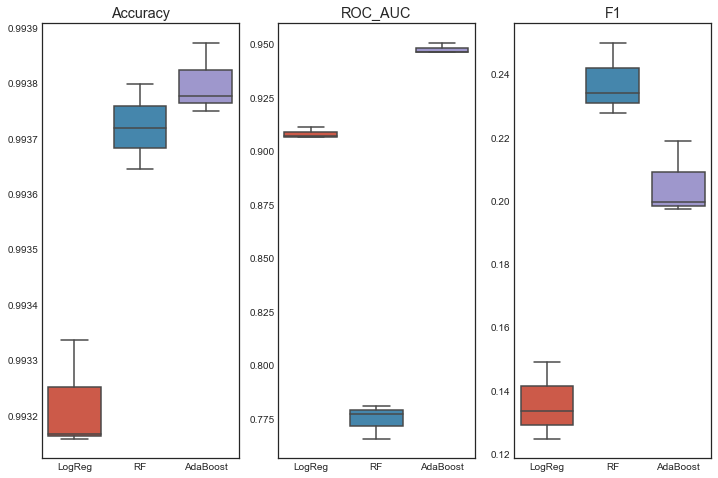

In [77]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

MLA_predict = pd.DataFrame({'set':X_test_full['set'], 'pmid':X_test_full['pmid'], 'ref_pmid': X_test_full['ref_pmid'],
                            'y_actual' : y_test}) # Actual value for X_test
MLA_predict_Z = pd.DataFrame({'set':full_test_df['set'], 'pmid':full_test_df['pmid'], 'ref_pmid': full_test_df['ref_pmid'],
                        }) # Actual value for X_test

MLA = [
#     dummy.DummyClassifier(strategy='most_frequent'),
    ('LogReg', Pipeline([('scaling', StandardScaler()), ('LR', linear_model.LogisticRegression(random_state=rand_st, n_jobs=-1))] ) ), 
#     ('KNN', Pipeline([('scaling', StandardScaler()), ('KNN', neighbors.KNeighborsClassifier())] ) ),
#     ('GNB', Pipeline([('scaling', StandardScaler()), ('GNB', naive_bayes.GaussianNB())] ) ),
#     ('DT', Pipeline([('scaling', StandardScaler()), ('DT',  tree.DecisionTreeClassifier())] ) ),
#     ('GPC', Pipeline([('scaling', StandardScaler()), ('GPC', gaussian_process.GaussianProcessClassifier())] ) ),
#     ('SVC', Pipeline([('scaling', StandardScaler()), ('SVC', svm.SVC())] )),
    ('RF', Pipeline([('scaling', StandardScaler()), ('RF', ensemble.RandomForestClassifier(random_state=rand_st, n_jobs=-1))] )),
     ('AdaBoost', Pipeline([('scaling', StandardScaler()), ('AdaBoost', ensemble.AdaBoostClassifier(random_state=rand_st))] )),
#      ('GradBoost', Pipeline([('scaling', StandardScaler()), ('GradBoost', ensemble.GradientBoostingClassifier(random_state=rand_st))] )),
]


#Cross validation
kfold = model_selection.StratifiedKFold(n_splits =3,shuffle=True, random_state=rand_st)

alg_names = []
alg_results_accuracy = []
alg_results_f1 = []
alg_results_auc = []
MLA_metrics = pd.DataFrame()

for idx, (name, alg) in enumerate(MLA):
#     mla_name = str(idx) + '_' + alg.__class__.__name__
    mla_name = name
    mla_params = str(alg.get_params())
    print('Training time for {0}'.format(mla_name))

    
    cv_results = model_selection.cross_validate(alg, X_train, y_train, cv=kfold, scoring=['accuracy','f1','roc_auc'])
    alg_results_accuracy.append(cv_results['test_accuracy'])
    alg_results_f1.append(cv_results['test_f1'])
    alg_results_auc.append(cv_results['test_roc_auc'])
    alg_names.append(mla_name)
    print('{0} --> Mean: {1:.3f} --> std: {2:.3f}'.format(mla_name, cv_results['train_accuracy'].mean(), cv_results['train_accuracy'].std()))
    
    MLA_metrics.loc[idx, 'MLA_name'] =  mla_name
    MLA_metrics.loc[idx, 'MLA_object'] =  alg
    MLA_metrics.loc[idx, 'MLA_params'] =  mla_params
  
    MLA_metrics.loc[idx, 'MLA_Train_Accuracy_Mean'] =  cv_results['train_accuracy'].mean()
    MLA_metrics.loc[idx, 'MLA_Test_Accuracy_Mean'] =  cv_results['test_accuracy'].mean()
    MLA_metrics.loc[idx, 'MLA_Test_Accuracy_Min'] =  cv_results['test_accuracy'].min()

    MLA_metrics.loc[idx, 'MLA_Train_f1_Mean'] =  cv_results['train_f1'].mean()
    MLA_metrics.loc[idx, 'MLA_Test_f1_Mean'] =  cv_results['test_f1'].mean()
    MLA_metrics.loc[idx, 'MLA_Test_f1_Min'] =  cv_results['test_f1'].min()
    
    MLA_metrics.loc[idx, 'MLA_Train_roc_auc_Mean'] =  cv_results['train_roc_auc'].mean()
    MLA_metrics.loc[idx, 'MLA_Test_roc_auc_Mean'] =  cv_results['test_roc_auc'].mean()
    MLA_metrics.loc[idx, 'MLA_Test_roc_auc_Min'] =  cv_results['test_roc_auc'].min()

    MLA_metrics.loc[idx,  'MLA_fit_time_Mean'] = cv_results['fit_time'].mean()
    
    # Get pred results for each alg
    print('Prediction time for {0}'.format(mla_name))
    alg.fit(X_train, y_train)
    MLA_predict[mla_name] = alg.predict_proba(X_test)[:,1]
    MLA_predict_Z[mla_name] = alg.predict_proba(Z_data)[:,1]
#     alg.predict_proba(X_test)
    
MLA_metrics
MLA_predict.loc[MLA_predict['y_actual'] >0, :]

## Alg comparisons
fig, axes = plt.subplots(nrows=1, ncols=3)
sns.boxplot(x=alg_names, y=alg_results_accuracy, ax=axes[0])
axes[0].set_title('Accuracy')
sns.boxplot(x=alg_names, y=alg_results_auc, ax=axes[1])
axes[1].set_title('ROC_AUC')
sns.boxplot(x=alg_names, y=alg_results_f1, ax=axes[2])
axes[2].set_title('F1')



MLA_predict_Z.info()
MLA_predict_Z.head(5)

In [82]:
### De-Normalize the data
MLA_predict.info()
threshold_prob = 0.49

MLA_predict_thresh = MLA_predict.loc[MLA_predict['AdaBoost'] > threshold_prob, ['pmid','ref_pmid'] ]
MLA_predict_thresh['pmid'] = MLA_predict_thresh['pmid'].astype('int64')
MLA_predict_thresh['ref_pmid'] = MLA_predict_thresh['ref_pmid'].apply(lambda x: str(int(x)))
# MLA_predict_thresh['ref_pmid'] = MLA_predict_thresh['ref_pmid'].apply(lambda x: str(x))


MLA_predict_thresh.head(5)
predict_norm = MLA_predict_thresh.groupby('pmid')['ref_pmid'].apply(lambda x: list(x))
# predict_norm = MLA_predict_thresh.groupby('pmid')['ref_pmid'].apply(lambda x: ','.join(x))

predict_norm.head(20)
predict_norm_df = pd.DataFrame(predict_norm.reset_index() )
predict_norm_df.columns = ['pmid','predicted_ref_pmid_int']
# predict_norm_df['predicted_ref_pmid_str'] = predict_norm_df['predicted_ref_pmid_int'].apply(ast.literal_eval)

predict_norm_df.info()
predict_norm_df.head(10)


## ---------Test dataset
print('De-normalizing test dataset ...')
MLA_predict_thresh_Z = MLA_predict_Z.loc[MLA_predict_Z['AdaBoost'] > threshold_prob, ['pmid','ref_pmid'] ]
MLA_predict_thresh_Z['pmid'] = MLA_predict_thresh_Z['pmid'].astype('int64')
MLA_predict_thresh_Z['ref_pmid'] = MLA_predict_thresh_Z['ref_pmid'].apply(lambda x: str(int(x)))

MLA_predict_thresh_Z.head(5)
predict_norm_Z = MLA_predict_thresh_Z.groupby('pmid')['ref_pmid'].apply(lambda x: list(x))

predict_norm_Z_df = pd.DataFrame(predict_norm_Z.reset_index() )
predict_norm_Z_df.columns = ['pmid','ref_list']

predict_norm_Z_df.info()
predict_norm_Z_df.head(20)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 172207 entries, 66325 to 183661
Data columns (total 7 columns):
pmid        172207 non-null int64
ref_pmid    172207 non-null int64
set         172207 non-null int64
y_actual    172207 non-null int64
LogReg      172207 non-null float64
RF          172207 non-null float64
AdaBoost    172207 non-null float64
dtypes: float64(3), int64(4)
memory usage: 10.5 MB


,pmid,ref_pmid
844382,19776066,17785263
434525,11889239,16247049
366782,1691261,2574461
224404,4729052,4641855
162468,2832747,3927296


pmid
26908                                 [184872]
53267                                [1100765]
63534                         [1084408, 53267]
109572                               [4970226]
125290                               [4543023]
149110                               [1094460]
171627                               [4530273]
177975                               [4349491]
209457                               [4373732]
225559                                [206891]
231762                                [274714]
274713                                [270678]
291033                       [1103090, 218170]
300783                               [4577289]
302134                       [1168691, 786433]
329684              [1185106, 819460, 1184745]
369752    [1081574, 4139225, 1089602, 4543023]
376774                                [368287]
390497                                [704357]
497528                                 [28807]
Name: ref_pmid, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 2 columns):
pmid                      790 non-null int64
predicted_ref_pmid_int    790 non-null object
dtypes: int64(1), object(1)
memory usage: 12.4+ KB


,pmid,predicted_ref_pmid_int
0,26908,[184872]
1,53267,[1100765]
2,63534,"[1084408, 53267]"
3,109572,[4970226]
4,125290,[4543023]
5,149110,[1094460]
6,171627,[4530273]
7,177975,[4349491]
8,209457,[4373732]
9,225559,[206891]


De-normalizing test dataset ...


,pmid,ref_pmid
3,19871314,19869404
27,19871314,19870855
47,19871314,19870362
48,19871314,19870148
73,19871314,19870707


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Data columns (total 2 columns):
pmid        1694 non-null int64
ref_list    1694 non-null object
dtypes: int64(1), object(1)
memory usage: 26.5+ KB


,pmid,ref_list
0,672,"[171661, 4578444, 4144294, 4341704, 4343963, 4270946, 4590489, 4155073, 4156360, 4373740, 4579004, 4587250, 4598306, 4394455]"
1,3509,[1098043]
2,5996,"[168887, 127786, 776172, 1090590, 1090591, 1090592, 4941570, 4576401]"
3,6961,"[171661, 174094, 672]"
4,7240,"[938474, 4610567]"
5,8039,"[1220686, 1156392]"
6,11783,[999652]
7,12754,"[1147905, 167718, 5449121]"
8,17116,[1061146]
9,17386,"[1147905, 12754, 167718, 5449121]"


In [73]:
### Calculate the metrics
import ast
# combined_df_2['ref_list_int'] = combined_df_2['ref_list'].apply(lambda x: [int(e) for e in x])

predict_norm_df.info()
predict_norm_df.head()
combined_df_2.info()
combined_df_2.head()

output_with_input_df = pd.merge(combined_df_2, predict_norm_df, on = 'pmid')
output_with_input_df.head()

# weighted_f1_score = f1_score(output_with_input_df['ref_list'], output_with_input_df['predicted_ref_pmid_str'], average= 'weighted')
# print('*** Weighted F1 score (for train dataset): {0}'.format(weighted_f1_score))

def ssr_f1_scorer(y_true, y_pred):
    print('Received :{0} and {1}'.format(y_true,y_pred))
    present_list = [int(elem) if elem in y_pred else 0 for elem in y_true  ] # To make samme length
    y_true_int = [int(elem) for elem in y_true]
    this_f1_score = f1_score(y_true_int, present_list, average='macro')
    print('F1 score is: {0}'.format(this_f1_score))
    print('Present list is:',present_list)
    return(this_f1_score)

output_with_input_df.loc[:,'ref_list_LIST'] = output_with_input_df.loc[:,'ref_list'].apply(ast.literal_eval)
# output_with_input_df.loc[:,'predicted_ref_pmid_int_LIST'] = output_with_input_df.loc[:,'predicted_ref_pmid_int'].apply(ast.literal_eval)

all_f1 = output_with_input_df.apply(lambda x: ssr_f1_scorer(x['ref_list_LIST'], x['predicted_ref_pmid_int']), axis=1 )
print('*** Custom Averaged F1 score: {0}'.format(np.average(all_f1))) #0.235 for set02 alone

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 2 columns):
pmid                      171 non-null int64
predicted_ref_pmid_int    171 non-null object
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


,pmid,predicted_ref_pmid_int
0,63534,[1084408]
1,149110,[1094460]
2,291033,[218170]
3,390497,[704357]
4,1335236,[2439065]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 2 columns):
pmid        3522 non-null int64
ref_list    3522 non-null object
dtypes: int64(1), object(1)
memory usage: 55.1+ KB


,pmid,ref_list
0,17074820,"['15153999', '15213210', '7668302']"
1,15153999,"['12721363', '9096352', '10788337', '9114021', '10330360']"
2,15213210,"['11466240', '12184798']"
3,7668302,['1539589']
4,12721363,"['9465087', '11842208', '11309498', '9465125', '9990074', '12486239']"


,pmid,ref_list,predicted_ref_pmid_int
0,12721363,"['9465087', '11842208', '11309498', '9465125', '9990074', '12486239']",[12486239]
1,14561327,"['11435412', '11842208', '12721363', '9465087', '11309498']",[12486239]
2,9465087,"['9144239', '9199574', '8962130']",[8962130]
3,12486239,"['9465087', '11842208', '9012413', '11309498']",[11435412]
4,9016524,['8594560'],[8594560]


Received :['9465087', '11842208', '11309498', '9465125', '9990074', '12486239'] and ['12486239']
F1 score is: 0.14285714285714285
Present list is: [0, 0, 0, 0, 0, 12486239]
Received :['11435412', '11842208', '12721363', '9465087', '11309498'] and ['12486239']
F1 score is: 0.0
Present list is: [0, 0, 0, 0, 0]
Received :['9144239', '9199574', '8962130'] and ['8962130']
F1 score is: 0.25
Present list is: [0, 0, 8962130]
Received :['9465087', '11842208', '9012413', '11309498'] and ['11435412']
F1 score is: 0.0
Present list is: [0, 0, 0, 0]
Received :['8594560'] and ['8594560']
F1 score is: 1.0
Present list is: [8594560]
Received :['7611282', '7568095', '8647407', '8644719', '8808610', '1346260', '8304347'] and ['8304347']
F1 score is: 0.125
Present list is: [0, 0, 0, 0, 0, 0, 8304347]
Received :['7624310', '8651264', '9055088', '9096352', '9106523', '9331370', '9463316', '10077682', '7705647'] and ['9585595']
F1 score is: 0.0
Present list is: [0, 0, 0, 0, 0, 0, 0, 0, 0]
Received :['1743489

Received :['1658187', '1940807', '1370682', '1535369', '6206178', '2783331', '2117633', '1902503'] and ['1535369']
F1 score is: 0.1111111111111111
Present list is: [0, 0, 0, 1535369, 0, 0, 0, 0]
Received :['4201262', '4542944', '4355998', '4583980'] and ['4542944']
F1 score is: 0.2
Present list is: [0, 4542944, 0, 0]
Received :['4201262', '4355998', '4583980'] and ['4583980']
F1 score is: 0.25
Present list is: [0, 0, 4583980]
Received :['6193236', '3029266', '3493320'] and ['3029266']
F1 score is: 0.25
Present list is: [0, 3029266, 0]
Received :['3755748', '2951480'] and ['3035555']
F1 score is: 0.0
Present list is: [0, 0]
Received :['6608105', '6332168', '6439737', '3873069', '3876401', '3753996'] and ['6439737']
F1 score is: 0.14285714285714285
Present list is: [0, 0, 6439737, 0, 0, 0]
Received :['2212944', '3029267', '2479030', '2647894', '3502713', '1976734'] and ['1824876']
F1 score is: 0.0
Present list is: [0, 0, 0, 0, 0, 0]
Received :['2212944', '1976734'] and ['2460872']
F1 sco

## Write file to upload

In [83]:
## Write output file
OUTPUT_FILE = FOLDER_PATH + 'base3_permut_4.csv'
print('*** Writing output file: {0}'.format(OUTPUT_FILE))

## Rename the columna name for printing purpose
predict_norm_Z_df.loc[:,['pmid', 'ref_list']].to_csv(OUTPUT_FILE, header=True, index=False, doublequote=False)


*** Writing output file: /Users/Shankar/PGMS/PYTHON/data/AV/innoplexus/base3_permut_4.csv
